In [231]:
!wget https://nlp100.github.io/data/neko.txt

--2023-04-24 08:29:42--  https://nlp100.github.io/data/neko.txt
nlp100.github.io (nlp100.github.io) をDNSに問いあわせています... 185.199.109.153, 185.199.110.153, 185.199.111.153, ...
nlp100.github.io (nlp100.github.io)|185.199.109.153|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 975789 (953K) [text/plain]
`neko.txt.1' に保存中

neko.txt.1          100%[===================>] 952.92K  --.-KB/s 時間 0.09s      

2023-04-24 08:29:43 (10.1 MB/s) - `neko.txt.1' へ保存完了 [975789/975789]



In [232]:
!mecab neko.txt > neko.txt.mecab

In [233]:
!head -20 neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*


In [338]:
%pip install toolz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python -m pip install --upgrade pip


## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ

In [234]:
#どんな感じかチェック

# count = 0

# with open('neko.txt.mecab') as f:
#     for l in f:
#         if count == 20:
#             break
#         else:
#             l = l.rstrip().replace('\t', ',').split(',')
#             count += 1
#             print(l)

In [351]:
sentence = []
morph_sens = []

with open('neko.txt.mecab') as f:
    for l in f:
        l = l.rstrip()
        if l == 'EOS':
            morph_sens.append(sentence)
            sentence = []
        else:
            morpheme = {}
            l = l.replace('\t', ',').split(',')
            if len(l) != 1:  
                morpheme['surface'] = l[0]
                morpheme['base'] = l[7]
                morpheme['pos'] = l[1]
                morpheme['pos1'] = l[2]
                sentence.append(morpheme)
            # else:
            #     assert len(l) == 8 or len(l) == 1, 'ウザいのがあります'

In [352]:
morph_sens[:5]

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'},
  {'surface': '', 'base': '*', 'pos': '記号', 'pos1': '一般'}],
 [{'surface': '', 'base': '*', 'pos': '記号', 'pos1': '一般'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
  {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'},
  {'surface': '', 'base': '*', 'pos': '記号', 'pos1': '一般'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'},
  {'surface': 

## 31.動詞
動詞の表層形をすべて抽出せよ．

In [353]:
def same_pos_info(key, value, result):
    lis = [w[result] for s in morph_sens for w in s if w[key] == value]
    return lis

In [354]:
len(set(same_pos_info('pos', '動詞','surface')))

3893

In [355]:
len(same_pos_info('pos', '動詞','surface'))

28906

In [356]:
same_pos_info('pos', '動詞','surface')[:10]

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え']

## 32.動詞の基本形
動詞の基本形をすべて抽出せよ．

In [357]:
same_pos_info('pos', '動詞','base')[:10]

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える']

In [358]:
len(same_pos_info('pos', '動詞','base'))

28906

In [359]:
len(set(same_pos_info('pos', '動詞','base')))

2300

## 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [360]:
no_nouns = []

for s in morph_sens:
    for i in range(1, len(s)):
        start = s[i-2]
        middle = s[i-1]
        end = s[i]
        if middle['surface'] == 'の' and start['pos'] == end['pos'] == '名詞':
            no_nouns.append(start['surface'] + middle['surface'] + end['surface'])

In [379]:
# sliding_windowめっちゃいい
from toolz.itertoolz import sliding_window 
no_nouns2 = []

for s in morph_sens:
    for w in sliding_window(3, s):
        if w[1]['surface'] == 'の' and w[0]['pos'] == w[2]['pos'] == '名詞':
            no_nouns2.append(w[0]['surface'] + w[1]['surface'] + w[2]['surface'])

In [367]:
print(no_nouns[:20])

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親', '藁の上', '笹原の中', '池の前', '池の上', '一樹の蔭', '垣根の穴', '隣家の三', '時の通路', '一刻の猶予', '家の内']


In [366]:
print(len(no_nouns))

6044


In [365]:
print(len(set(no_nouns)))

4924


## 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [392]:
n_conected = []
nouns = []

for s in morph_sens:
    for w in s:
        if w['pos'] == '名詞':
            nouns.append(w['surface'])
        else:
            if len(nouns) >= 2:
                n_conected.append(''.join(nouns))
            nouns = [] # ここ改善の余地ありだと思うけど思いつかない

In [390]:
n_conected2 = []
nouns = ''

for s in morph_sens:
    for w in s:
        if w['pos'] == '名詞':
            nouns = nouns + w['surface']
        else:
            if len(nouns) >= :
                n_conected2.append(nouns)
            nouns = '' # ここ改善の余地ありだと思うけど思いつかない

In [391]:
print(len(n_conected2))

33271


In [425]:
n_conected[:30]

['人間中',
 '一番獰悪',
 '時妙',
 '一毛',
 'その後猫',
 '一度',
 'ぷうぷうと煙',
 '邸内',
 '三毛',
 '書生以外',
 '四五遍',
 'この間おさん',
 '三馬',
 '御台所',
 'まま奥',
 '住家',
 '終日書斎',
 '勉強家',
 '勉強家',
 '勤勉家',
 '二三ページ',
 '主人以外',
 '限り吾輩',
 '朝主人',
 '一番心持',
 '二人',
 '一つ床',
 '一人',
 '最後大変',
 '——猫']

In [394]:
print(len(n_conected))

7338


In [395]:
print(len(set(n_conected)))

4457


## 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [401]:
from collections import defaultdict
word_count = defaultdict(int)

for s in morph_sens:
    for w in s:
        word_count[w['surface']] += 1

word_count = sorted(word_count.items(), key = lambda x : x[1], reverse = True) # items使うとタプルのリストに変わるので注意

In [400]:
word_count[:10]

[('', 9964),
 ('の', 9194),
 ('。', 7486),
 ('て', 6868),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('と', 5508),
 ('が', 5337)]

## 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [372]:
# 使える日本語対応フォント探し
# import matplotlib.font_manager
# print([f.name for f in matplotlib.font_manager.fontManager.ttflist])

In [420]:
word, count = zip(*word_count)

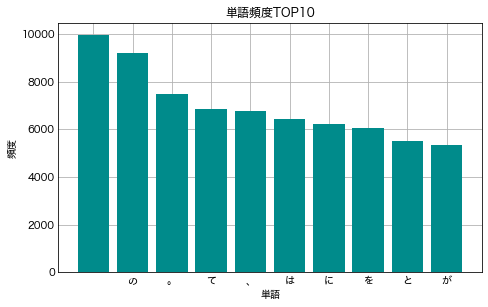

In [421]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'Hiragino Sans'

plt.bar(word[:10], count[:10], color='darkcyan')
plt.xlabel('単語')
plt.ylabel('頻度')
plt.title('単語頻度TOP10')
plt.show()

## 37. 「猫」と共起頻度の高い上位10語

「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [426]:
# 共起を1文のなかで一緒にいると定義する
from collections import defaultdict
neko_co_count = defaultdict(int)

for s in morph_sens:
    if '猫' in str(s):
        for w in s:
            base = w['base']
            if base != '猫':
                neko_co_count[base] += 1

neko_co_count = sorted(neko_co_count.items(), key = lambda x : x[1], reverse = True)

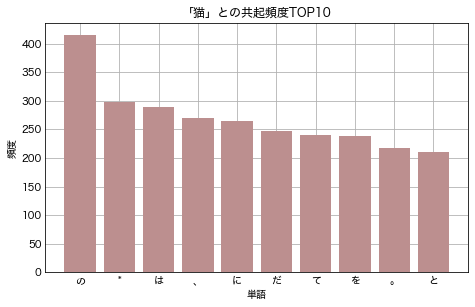

In [427]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'Hiragino Sans'

co_word, co_count = zip(*neko_co_count[:10])

plt.bar(co_word, co_count, color='rosybrown')
plt.xlabel('単語')
plt.ylabel('頻度')
plt.title('「猫」との共起頻度TOP10')
plt.show()

## 38. ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

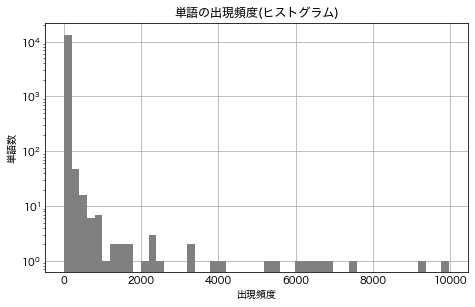

In [422]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Hiragino Sans'

plt.hist(count, bins=50, log=True, color='grey')
plt.xlabel('出現頻度')
plt.ylabel('単語数')
plt.title('単語の出現頻度(ヒストグラム)')
plt.show()

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

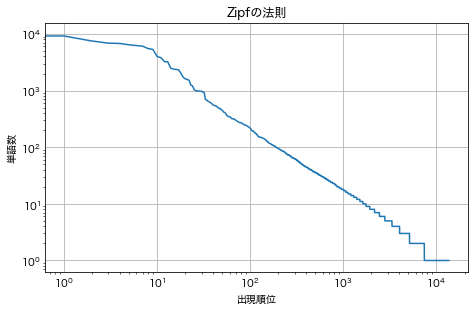

In [423]:
import matplotlib.pyplot as plt

plt.plot(count)

plt.xscale('log')
plt.yscale('log')

plt.title('Zipfの法則') 
plt.xlabel('出現順位')
plt.ylabel('単語数')

plt.show()